<a href="https://colab.research.google.com/github/iEpsilon-FPS/QU-MLinF/blob/master/4.6%20ML_in_Finance_Module_4_Case_study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Market Clustering
## Understanding the relationship between stocks

In [ ]:
# Install this if you don't have yfinance
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=b92391ee67eca3416519f2255035a972423efda0d81f4e061b2b71204618675d
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
# Acknowledgement: Affinity Propogation Code modified from original code:
# See: https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html

import datetime
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.collections import LineCollection

from sklearn import cluster, covariance, manifold

###############################################################################
# Retrieve the data from Internet

d1 = datetime.datetime(2019, 05, 1)
d2 = datetime.datetime(2019, 12, 31)

symbol_dict = {
'MMM':'3M',
'AXP':'American Express',
'AAPL':'Apple',
'BA':'Boeing',
'CAT':'Caterpillar',
'CVX':'Chevron',
'CSCO':'Cisco',
'KO':'Coca-Cola',
'DIS':'Disney',
'DOW':'Dow',
'XOM':'ExxonMobil',
'GS':'Goldman Sachs',
'HD':'Home Depot',
'IBM':'IBM',
'INTC':'Intel',
'JNJ':'Johnson & Johnson',
'JPM':'JP Morgan Chase',
'MCD':'McDonalds',
'MRK':'Merck',
'MSFT':'Microsoft',
'NKE':'Nike',
'PFE':'Pfizer',
'PG':'Procter & Gamble',
'RTX':'Raytheon Technologies',
'TRV':'Travelers',
'UNH':'UnitedHealth',
'VZ':'Verizon',
'V':'Visa',
'WBA':'Walgreens',
'WMT':'Wal-Mart'}
symbols, names = np.array(list(symbol_dict.items())).T

In [ ]:
names

array(['American Express', 'Boeing', 'Chevron', 'Cisco', 'Apple', 'Visa',
       'Caterpillar', 'Walgreens', 'Dow', 'Microsoft', 'IBM',
       'Home Depot', 'Disney', 'Raytheon Technologies',
       'Procter & Gamble', 'Goldman Sachs', 'Intel', 'Wal-Mart', 'Merck',
       'UnitedHealth', 'JP Morgan Chase', 'Verizon', 'ExxonMobil',
       'Travelers', 'Pfizer', 'Nike', 'McDonalds', 'Coca-Cola', '3M',
       'Johnson & Johnson'], dtype='|S21')

In [ ]:
tickers = [yf.Ticker(symbol) for symbol in symbols]
quotes= [ticker.history(start = d1, end = d2) for ticker in tickers]

In [ ]:
quotes[1].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-01,369.66,372.27,367.56,367.97,2765600,0.0,0
2019-05-02,366.71,368.80,364.51,367.00,2438800,0.0,0
2019-05-03,367.27,369.05,365.46,367.64,2953800,0.0,0
2019-05-06,359.26,363.76,357.07,362.90,4747600,0.0,0
2019-05-07,357.75,359.10,346.70,348.86,9740300,0.0,0


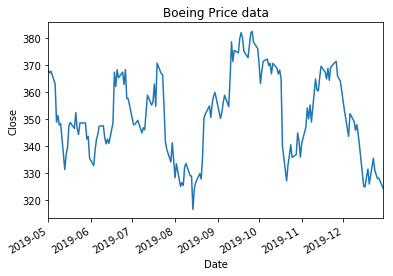

In [ ]:
ba = quotes[1]
ba["Close"].plot()
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boeing Price data")
plt.show()

In [ ]:
closes = np.array([q.Close.to_numpy() for q in quotes])
opens = np.array([q.Open.to_numpy() for q in quotes])
df = pd.DataFrame(closes.T, columns = symbol_dict)
df.head()

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
0,115.17,367.97,113.03,53.91,207.80,161.80,133.85,51.90,52.85,126.21,134.29,193.67,134.73,86.15,102.30,200.18,49.59,99.44,76.52,227.98,111.56,54.20,74.83,139.75,39.25,84.98,189.61,47.10,179.62,138.09
1,115.40,367.00,111.66,53.28,206.45,160.14,130.96,52.01,49.62,124.56,133.36,195.83,132.52,85.07,102.91,200.43,49.39,99.24,77.30,228.47,111.80,54.65,73.52,139.38,39.48,84.36,190.04,46.90,178.35,137.44
2,117.46,367.64,112.51,53.28,209.01,161.05,134.73,52.29,50.19,127.22,133.99,195.39,132.71,86.18,103.42,202.91,50.56,100.15,77.76,227.98,112.49,54.89,73.69,140.01,39.85,84.78,192.89,47.22,178.80,138.15
3,117.45,362.90,113.59,52.94,205.79,161.29,132.50,52.14,50.34,126.48,134.12,194.48,133.37,85.31,103.03,201.84,50.35,100.52,77.26,236.38,111.49,54.58,73.37,140.09,40.10,82.68,194.23,46.98,176.70,138.23
4,116.35,348.86,113.47,51.84,200.24,159.24,129.51,51.19,49.86,123.88,131.50,189.75,131.83,82.42,102.07,198.13,49.62,99.38,75.72,233.97,109.67,54.31,72.98,138.41,39.31,81.66,193.39,46.52,172.91,136.17


In [ ]:
returns = df.pct_change()
returns.head().dropna()

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
1,0.001997,-0.002636,-0.012121,-0.011686,-0.006497,-0.010260,-0.021591,0.002119,-0.061116,-0.013073,-0.006925,0.011153,-0.016403,-0.012536,0.005963,0.001249,-0.004033,-0.002011,0.010193,0.002149,0.002151,0.008303,-0.017506,-0.002648,0.005860,-0.007296,0.002268,-0.004246,-0.007070,-0.004707
2,0.017851,0.001744,0.007612,0.000000,0.012400,0.005683,0.028787,0.005384,0.011487,0.021355,0.004724,-0.002247,0.001434,0.013048,0.004956,0.012373,0.023689,0.009170,0.005951,-0.002145,0.006172,0.004392,0.002312,0.004520,0.009372,0.004979,0.014997,0.006823,0.002523,0.005166
3,-0.000085,-0.012893,0.009599,-0.006381,-0.015406,0.001490,-0.016552,-0.002869,0.002989,-0.005817,0.000970,-0.004657,0.004973,-0.010095,-0.003771,-0.005273,-0.004153,0.003694,-0.006430,0.036845,-0.008890,-0.005648,-0.004343,0.000571,0.006274,-0.024770,0.006947,-0.005083,-0.011745,0.000579
4,-0.009366,-0.038688,-0.001056,-0.020778,-0.026969,-0.012710,-0.022566,-0.018220,-0.009535,-0.020557,-0.019535,-0.024321,-0.011547,-0.033876,-0.009318,-0.018381,-0.014499,-0.011341,-0.019933,-0.010195,-0.016324,-0.004947,-0.005316,-0.011992,-0.019701,-0.012337,-0.004325,-0.009791,-0.021449,-0.014903


In [ ]:
corrMatrix = returns.corr()
corrMatrix

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
AXP,1.000000,0.251689,0.462287,0.501916,0.611649,0.655017,0.519406,0.411782,0.442701,0.685952,0.532919,0.455853,0.415472,0.610352,0.328266,0.658928,0.551331,0.482028,0.345616,0.296419,0.640319,0.309258,0.465546,0.418242,0.333885,0.537004,0.376245,0.319158,0.533238,0.316399
BA,0.251689,1.000000,0.289163,0.249289,0.307161,0.207292,0.366176,0.307690,0.292050,0.333596,0.260078,0.235161,0.110553,0.408824,0.100766,0.342175,0.260635,0.201882,0.073780,0.115453,0.295593,0.067376,0.318624,0.039246,0.076611,0.219100,-0.045891,0.061079,0.274687,0.201080
CVX,0.462287,0.289163,1.000000,0.407218,0.424440,0.255119,0.489675,0.446498,0.556552,0.415155,0.442206,0.279131,0.274926,0.471175,0.032949,0.545486,0.378264,0.255894,0.120403,0.169860,0.544221,0.252140,0.779117,0.169267,0.259802,0.367843,0.019664,0.085547,0.482035,0.161728
CSCO,0.501916,0.249289,0.407218,1.000000,0.545307,0.380712,0.405883,0.373886,0.421104,0.564442,0.501616,0.318189,0.348978,0.458446,0.248926,0.462118,0.478142,0.144226,0.276003,0.240063,0.448092,0.192679,0.445454,0.234454,0.310892,0.496354,0.216706,0.128580,0.398749,0.291740
AAPL,0.611649,0.307161,0.424440,0.545307,1.000000,0.539234,0.569462,0.448885,0.499743,0.634593,0.540225,0.464301,0.396753,0.589455,0.227831,0.622905,0.650736,0.317940,0.268976,0.155045,0.582583,0.128249,0.490896,0.301524,0.306697,0.572784,0.206915,0.224686,0.517268,0.228828
V,0.655017,0.207292,0.255119,0.380712,0.539234,1.000000,0.254965,0.208828,0.278079,0.779754,0.463726,0.423294,0.371744,0.553670,0.395449,0.416262,0.461391,0.480721,0.389633,0.160962,0.375780,0.219026,0.317515,0.561929,0.342746,0.430059,0.424478,0.391114,0.295198,0.209657
CAT,0.519406,0.366176,0.489675,0.405883,0.569462,0.254965,1.000000,0.539866,0.640075,0.414574,0.535831,0.403765,0.290081,0.604886,0.045460,0.666804,0.603858,0.303607,0.052864,0.265467,0.674336,0.173707,0.609436,0.115709,0.334119,0.415387,0.001755,0.087379,0.652383,0.165160
WBA,0.411782,0.307690,0.446498,0.373886,0.448885,0.208828,0.539866,1.000000,0.506734,0.345774,0.444955,0.340820,0.205896,0.444549,0.060608,0.492787,0.376409,0.179406,0.060676,0.281779,0.532346,0.214383,0.487560,0.106806,0.285823,0.359007,-0.009140,0.023071,0.466765,0.206078
DOW,0.442701,0.292050,0.556552,0.421104,0.499743,0.278079,0.640075,0.506734,1.000000,0.419337,0.517508,0.253961,0.195125,0.517733,0.062151,0.604157,0.474391,0.203694,0.102236,0.203832,0.570977,0.188648,0.548853,0.173491,0.296169,0.380488,-0.034080,0.169105,0.547106,0.138217
MSFT,0.685952,0.333596,0.415155,0.564442,0.634593,0.779754,0.414574,0.345774,0.419337,1.000000,0.588536,0.471419,0.399969,0.622280,0.366036,0.519975,0.602557,0.442121,0.390247,0.285777,0.485726,0.196178,0.442170,0.433189,0.345175,0.554291,0.358699,0.342779,0.464631,0.318476


In [ ]:

# Limit number of digits:
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
AXP,1,0.25,0.46,0.5,0.61,0.66,0.52,0.41,0.44,0.69,0.53,0.46,0.42,0.61,0.33,0.66,0.55,0.48,0.35,0.3,0.64,0.31,0.47,0.42,0.33,0.54,0.38,0.32,0.53,0.32
BA,0.25,1,0.29,0.25,0.31,0.21,0.37,0.31,0.29,0.33,0.26,0.24,0.11,0.41,0.1,0.34,0.26,0.2,0.074,0.12,0.3,0.067,0.32,0.039,0.077,0.22,-0.046,0.061,0.27,0.2
CVX,0.46,0.29,1,0.41,0.42,0.26,0.49,0.45,0.56,0.42,0.44,0.28,0.27,0.47,0.033,0.55,0.38,0.26,0.12,0.17,0.54,0.25,0.78,0.17,0.26,0.37,0.02,0.086,0.48,0.16
CSCO,0.5,0.25,0.41,1,0.55,0.38,0.41,0.37,0.42,0.56,0.5,0.32,0.35,0.46,0.25,0.46,0.48,0.14,0.28,0.24,0.45,0.19,0.45,0.23,0.31,0.5,0.22,0.13,0.4,0.29
AAPL,0.61,0.31,0.42,0.55,1,0.54,0.57,0.45,0.5,0.63,0.54,0.46,0.4,0.59,0.23,0.62,0.65,0.32,0.27,0.16,0.58,0.13,0.49,0.3,0.31,0.57,0.21,0.22,0.52,0.23
V,0.66,0.21,0.26,0.38,0.54,1,0.25,0.21,0.28,0.78,0.46,0.42,0.37,0.55,0.4,0.42,0.46,0.48,0.39,0.16,0.38,0.22,0.32,0.56,0.34,0.43,0.42,0.39,0.3,0.21
CAT,0.52,0.37,0.49,0.41,0.57,0.25,1,0.54,0.64,0.41,0.54,0.4,0.29,0.6,0.045,0.67,0.6,0.3,0.053,0.27,0.67,0.17,0.61,0.12,0.33,0.42,0.0018,0.087,0.65,0.17
WBA,0.41,0.31,0.45,0.37,0.45,0.21,0.54,1,0.51,0.35,0.44,0.34,0.21,0.44,0.061,0.49,0.38,0.18,0.061,0.28,0.53,0.21,0.49,0.11,0.29,0.36,-0.0091,0.023,0.47,0.21
DOW,0.44,0.29,0.56,0.42,0.5,0.28,0.64,0.51,1,0.42,0.52,0.25,0.2,0.52,0.062,0.6,0.47,0.2,0.1,0.2,0.57,0.19,0.55,0.17,0.3,0.38,-0.034,0.17,0.55,0.14
MSFT,0.69,0.33,0.42,0.56,0.63,0.78,0.41,0.35,0.42,1,0.59,0.47,0.4,0.62,0.37,0.52,0.6,0.44,0.39,0.29,0.49,0.2,0.44,0.43,0.35,0.55,0.36,0.34,0.46,0.32


In [ ]:
import plotly.figure_factory as ff
figure = ff.create_annotated_heatmap(
z=corrMatrix.values,
y=list(corrMatrix.columns),
x=list(corrMatrix.index),
annotation_text=corrMatrix.round(2).values,
showscale=True, colorscale="Viridis")

In [ ]:
distance = 1-corrMatrix.pow(2) # compute distance (Mantegna, 1998 https://arxiv.org/pdf/cond-mat/9802256.pdf)

In [ ]:
distance

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
AXP,0.000000,0.936653,0.786291,0.748081,0.625885,0.570952,0.730217,0.830435,0.804016,0.529470,0.715997,0.792198,0.827383,0.627470,0.892241,0.565814,0.696034,0.767649,0.880549,0.912136,0.589992,0.904360,0.783267,0.825073,0.888521,0.711626,0.858440,0.898138,0.715658,0.899892
BA,0.936653,0.000000,0.916385,0.937855,0.905652,0.957030,0.865915,0.905327,0.914707,0.888714,0.932360,0.944699,0.987778,0.832863,0.989846,0.882916,0.932070,0.959244,0.994557,0.986671,0.912625,0.995460,0.898479,0.998460,0.994131,0.951995,0.997894,0.996269,0.924547,0.959567
CVX,0.786291,0.916385,0.000000,0.834174,0.819851,0.934914,0.760218,0.800639,0.690250,0.827646,0.804454,0.922086,0.924416,0.777994,0.998914,0.702445,0.856916,0.934518,0.985503,0.971148,0.703823,0.936425,0.392977,0.971349,0.932503,0.864692,0.999613,0.992682,0.767642,0.973844
CSCO,0.748081,0.937855,0.834174,0.000000,0.702640,0.855058,0.835259,0.860209,0.822671,0.681405,0.748382,0.898756,0.878214,0.789827,0.938036,0.786447,0.771380,0.979199,0.923823,0.942370,0.799213,0.962875,0.801571,0.945032,0.903346,0.753633,0.953039,0.983467,0.840999,0.914888
AAPL,0.625885,0.905652,0.819851,0.702640,0.000000,0.709227,0.675713,0.798502,0.750257,0.597292,0.708157,0.784424,0.842587,0.652543,0.948093,0.611989,0.576543,0.898914,0.927652,0.975961,0.660597,0.983552,0.759022,0.909083,0.905937,0.671918,0.957186,0.949516,0.732434,0.947638
V,0.570952,0.957030,0.934914,0.855058,0.709227,0.000000,0.934993,0.956391,0.922672,0.391984,0.784959,0.820822,0.861806,0.693449,0.843620,0.826726,0.787118,0.768908,0.848186,0.974091,0.858790,0.952027,0.899184,0.684236,0.882525,0.815049,0.819819,0.847030,0.912858,0.956044
CAT,0.730217,0.865915,0.760218,0.835259,0.675713,0.934993,0.000000,0.708545,0.590304,0.828129,0.712886,0.836974,0.915853,0.634113,0.997933,0.555373,0.635356,0.907823,0.997205,0.929527,0.545271,0.969826,0.628587,0.986611,0.888364,0.827454,0.999997,0.992365,0.574396,0.972722
WBA,0.830435,0.905327,0.800639,0.860209,0.798502,0.956391,0.708545,0.000000,0.743221,0.880440,0.802015,0.883842,0.957607,0.802376,0.996327,0.757161,0.858317,0.967814,0.996318,0.920601,0.716608,0.954040,0.762285,0.988592,0.918305,0.871114,0.999916,0.999468,0.782131,0.957532
DOW,0.804016,0.914707,0.690250,0.822671,0.750257,0.922672,0.590304,0.743221,0.000000,0.824157,0.732185,0.935504,0.961926,0.731953,0.996137,0.634994,0.774953,0.958509,0.989548,0.958452,0.673985,0.964412,0.698761,0.969901,0.912284,0.855229,0.998839,0.971404,0.700675,0.980896
MSFT,0.529470,0.888714,0.827646,0.681405,0.597292,0.391984,0.828129,0.880440,0.824157,0.000000,0.653625,0.777765,0.840025,0.612767,0.866018,0.729626,0.636925,0.804529,0.847707,0.918332,0.764070,0.961514,0.804486,0.812348,0.880854,0.692761,0.871335,0.882503,0.784118,0.898573


In [ ]:
# Limit number of digits:
distance.style.background_gradient(cmap='viridis').set_precision(2)

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
AXP,0,0.94,0.79,0.75,0.63,0.57,0.73,0.83,0.8,0.53,0.72,0.79,0.83,0.63,0.89,0.57,0.7,0.77,0.88,0.91,0.59,0.9,0.78,0.83,0.89,0.71,0.86,0.9,0.72,0.9
BA,0.94,0,0.92,0.94,0.91,0.96,0.87,0.91,0.91,0.89,0.93,0.94,0.99,0.83,0.99,0.88,0.93,0.96,0.99,0.99,0.91,1,0.9,1,0.99,0.95,1,1,0.92,0.96
CVX,0.79,0.92,0,0.83,0.82,0.93,0.76,0.8,0.69,0.83,0.8,0.92,0.92,0.78,1,0.7,0.86,0.93,0.99,0.97,0.7,0.94,0.39,0.97,0.93,0.86,1,0.99,0.77,0.97
CSCO,0.75,0.94,0.83,0,0.7,0.86,0.84,0.86,0.82,0.68,0.75,0.9,0.88,0.79,0.94,0.79,0.77,0.98,0.92,0.94,0.8,0.96,0.8,0.95,0.9,0.75,0.95,0.98,0.84,0.91
AAPL,0.63,0.91,0.82,0.7,0,0.71,0.68,0.8,0.75,0.6,0.71,0.78,0.84,0.65,0.95,0.61,0.58,0.9,0.93,0.98,0.66,0.98,0.76,0.91,0.91,0.67,0.96,0.95,0.73,0.95
V,0.57,0.96,0.93,0.86,0.71,0,0.93,0.96,0.92,0.39,0.78,0.82,0.86,0.69,0.84,0.83,0.79,0.77,0.85,0.97,0.86,0.95,0.9,0.68,0.88,0.82,0.82,0.85,0.91,0.96
CAT,0.73,0.87,0.76,0.84,0.68,0.93,0,0.71,0.59,0.83,0.71,0.84,0.92,0.63,1,0.56,0.64,0.91,1,0.93,0.55,0.97,0.63,0.99,0.89,0.83,1,0.99,0.57,0.97
WBA,0.83,0.91,0.8,0.86,0.8,0.96,0.71,0,0.74,0.88,0.8,0.88,0.96,0.8,1,0.76,0.86,0.97,1,0.92,0.72,0.95,0.76,0.99,0.92,0.87,1,1,0.78,0.96
DOW,0.8,0.91,0.69,0.82,0.75,0.92,0.59,0.74,0,0.82,0.73,0.94,0.96,0.73,1,0.63,0.77,0.96,0.99,0.96,0.67,0.96,0.7,0.97,0.91,0.86,1,0.97,0.7,0.98
MSFT,0.53,0.89,0.83,0.68,0.6,0.39,0.83,0.88,0.82,0,0.65,0.78,0.84,0.61,0.87,0.73,0.64,0.8,0.85,0.92,0.76,0.96,0.8,0.81,0.88,0.69,0.87,0.88,0.78,0.9


In [ ]:
## Hierarchical clustering

In [ ]:
import scipy.spatial as sci
from scipy.cluster.hierarchy import dendrogram, linkage
conDist = sci.distance.squareform(distance)
L = linkage(conDist, 'average')

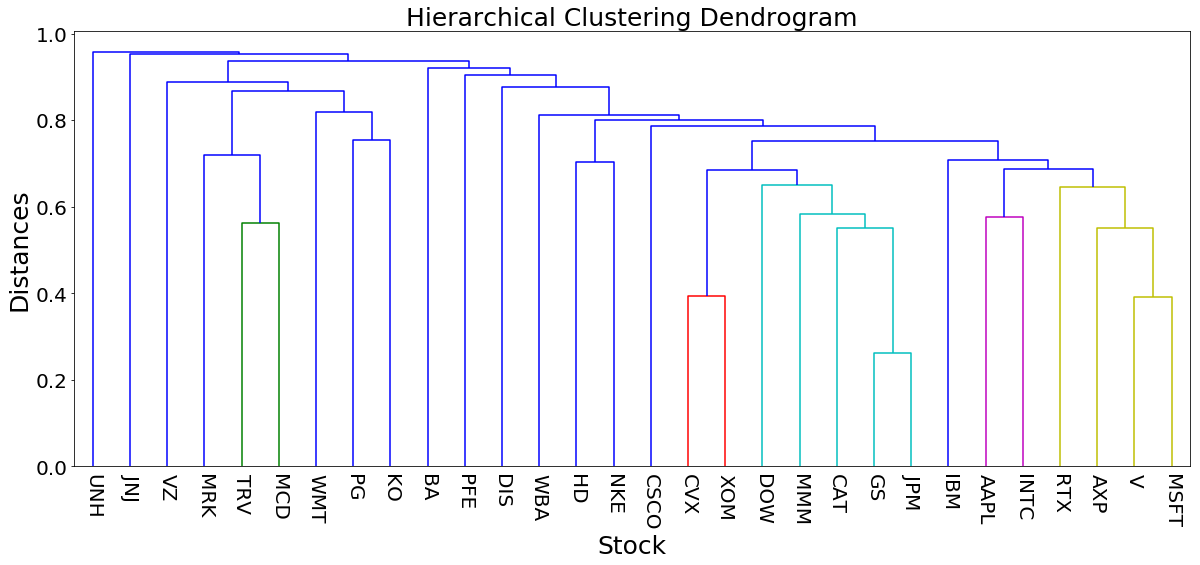

In [ ]:
plt.figure(figsize=(20,8))
labelsize=25
ticksize=20
plt.title('Hierarchical Clustering Dendrogram', fontsize=labelsize)
plt.xlabel('Stock', fontsize=labelsize)
plt.ylabel('Distances', fontsize=labelsize)
dendrogram(
    L,
    leaf_font_size=8.,
    labels = symbols
)
plt.yticks(fontsize=ticksize)
plt.xticks(rotation=-90, fontsize=ticksize)
plt.show()

## Affinity propogation

In [ ]:
close_prices = closes
open_prices = opens

In [ ]:
# The daily variations of the quotes are what carry information
variation = close_prices - open_prices

# #############################################################################
#https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html
#https://scikit-learn.org/stable/modules/covariance.html#sparse-inverse-covariance

# Learn a graphical structure from the correlations; Use sparse inverse covariance estimation to find which quotes are correlated conditionally on the others
edge_model = covariance.GraphicalLassoCV(cv=5)

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

GraphicalLassoCV(alphas=4, assume_centered=False, cv=5, enet_tol=0.0001,
         max_iter=100, mode='cd', n_jobs=None, n_refinements=4, tol=0.0001,
         verbose=False)

In [ ]:
type(edge_model.covariance_)
df = pd.DataFrame(data=edge_model.covariance_, index=symbol_dict, columns = symbol_dict)
df

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
AXP,1.000000,0.069553,0.184031,0.346176,0.345634,0.435818,0.241584,0.153775,0.190168,0.476863,0.291008,0.230594,0.147892,0.301631,0.154950,0.366272,0.259425,0.129080,0.147579,0.145212,0.353355,0.119161,0.196037,0.258955,0.116463,0.184929,0.178819,0.158702,0.218315,0.136656
BA,0.069553,1.000000,0.080273,0.063412,0.074305,0.053109,0.103613,0.045059,0.059806,0.068131,0.056813,0.052209,0.033445,0.151740,0.026292,0.077990,0.066191,0.019359,0.024651,0.022882,0.076399,0.021911,0.065001,0.046962,0.020734,0.042734,0.026372,0.025632,0.063231,0.017920
CVX,0.184031,0.080273,1.000000,0.223098,0.188984,0.133451,0.299609,0.188491,0.281990,0.183613,0.199465,0.113994,0.071307,0.182990,0.065101,0.252423,0.253384,0.058367,0.060489,0.070569,0.249998,0.057173,0.567310,0.100836,0.063273,0.115893,0.061407,0.063641,0.307441,0.050709
CSCO,0.346176,0.063412,0.223098,1.000000,0.349801,0.272564,0.239781,0.178738,0.256913,0.406767,0.348843,0.163939,0.145054,0.211167,0.143228,0.256316,0.274829,0.086905,0.124493,0.179941,0.241834,0.094226,0.252977,0.195826,0.132472,0.151302,0.124074,0.128846,0.209901,0.135921
AAPL,0.345634,0.074305,0.188984,0.349801,1.000000,0.274938,0.257072,0.193840,0.191316,0.369870,0.234049,0.183298,0.139626,0.229599,0.108269,0.325301,0.393362,0.083573,0.101168,0.118703,0.277390,0.087294,0.192147,0.171381,0.088927,0.189926,0.113496,0.107530,0.215650,0.087245
V,0.435818,0.053109,0.133451,0.272564,0.274938,1.000000,0.171037,0.109848,0.134825,0.544516,0.198489,0.192842,0.142116,0.240496,0.170557,0.221247,0.219435,0.108775,0.158748,0.116333,0.210655,0.126325,0.140158,0.291279,0.099402,0.170824,0.207932,0.201301,0.147581,0.112146
CAT,0.241584,0.103613,0.299609,0.239781,0.257072,0.171037,1.000000,0.290841,0.402665,0.235775,0.260763,0.141996,0.086611,0.252745,0.072824,0.373368,0.382878,0.056920,0.072138,0.089844,0.344598,0.067951,0.289578,0.121477,0.079359,0.120451,0.059490,0.074473,0.283968,0.061213
WBA,0.153775,0.045059,0.188491,0.178738,0.193840,0.109848,0.290841,1.000000,0.245235,0.151205,0.264750,0.082809,0.054580,0.127043,0.048791,0.190906,0.183632,0.036532,0.050240,0.057855,0.177178,0.042219,0.165048,0.077670,0.065933,0.074014,0.045797,0.048866,0.223645,0.042101
DOW,0.190168,0.059806,0.281990,0.256913,0.191316,0.134825,0.402665,0.245235,1.000000,0.187410,0.269648,0.105276,0.068362,0.161906,0.062332,0.263996,0.229923,0.046196,0.061360,0.076330,0.235616,0.053552,0.234865,0.097256,0.074567,0.091605,0.056208,0.061468,0.301694,0.053923
MSFT,0.476863,0.068131,0.183613,0.406767,0.369870,0.544516,0.235775,0.151205,0.187410,1.000000,0.275124,0.242167,0.153639,0.292119,0.166494,0.278814,0.335869,0.111705,0.172637,0.177983,0.262592,0.127947,0.192233,0.288690,0.123816,0.228618,0.184109,0.175903,0.198927,0.145774


In [ ]:
# Limit number of digits:
df.style.background_gradient(cmap='viridis').set_precision(2)

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
AXP,1,0.07,0.18,0.35,0.35,0.44,0.24,0.15,0.19,0.48,0.29,0.23,0.15,0.3,0.15,0.37,0.26,0.13,0.15,0.15,0.35,0.12,0.2,0.26,0.12,0.18,0.18,0.16,0.22,0.14
BA,0.07,1,0.08,0.063,0.074,0.053,0.1,0.045,0.06,0.068,0.057,0.052,0.033,0.15,0.026,0.078,0.066,0.019,0.025,0.023,0.076,0.022,0.065,0.047,0.021,0.043,0.026,0.026,0.063,0.018
CVX,0.18,0.08,1,0.22,0.19,0.13,0.3,0.19,0.28,0.18,0.2,0.11,0.071,0.18,0.065,0.25,0.25,0.058,0.06,0.071,0.25,0.057,0.57,0.1,0.063,0.12,0.061,0.064,0.31,0.051
CSCO,0.35,0.063,0.22,1,0.35,0.27,0.24,0.18,0.26,0.41,0.35,0.16,0.15,0.21,0.14,0.26,0.27,0.087,0.12,0.18,0.24,0.094,0.25,0.2,0.13,0.15,0.12,0.13,0.21,0.14
AAPL,0.35,0.074,0.19,0.35,1,0.27,0.26,0.19,0.19,0.37,0.23,0.18,0.14,0.23,0.11,0.33,0.39,0.084,0.1,0.12,0.28,0.087,0.19,0.17,0.089,0.19,0.11,0.11,0.22,0.087
V,0.44,0.053,0.13,0.27,0.27,1,0.17,0.11,0.13,0.54,0.2,0.19,0.14,0.24,0.17,0.22,0.22,0.11,0.16,0.12,0.21,0.13,0.14,0.29,0.099,0.17,0.21,0.2,0.15,0.11
CAT,0.24,0.1,0.3,0.24,0.26,0.17,1,0.29,0.4,0.24,0.26,0.14,0.087,0.25,0.073,0.37,0.38,0.057,0.072,0.09,0.34,0.068,0.29,0.12,0.079,0.12,0.059,0.074,0.28,0.061
WBA,0.15,0.045,0.19,0.18,0.19,0.11,0.29,1,0.25,0.15,0.26,0.083,0.055,0.13,0.049,0.19,0.18,0.037,0.05,0.058,0.18,0.042,0.17,0.078,0.066,0.074,0.046,0.049,0.22,0.042
DOW,0.19,0.06,0.28,0.26,0.19,0.13,0.4,0.25,1,0.19,0.27,0.11,0.068,0.16,0.062,0.26,0.23,0.046,0.061,0.076,0.24,0.054,0.23,0.097,0.075,0.092,0.056,0.061,0.3,0.054
MSFT,0.48,0.068,0.18,0.41,0.37,0.54,0.24,0.15,0.19,1,0.28,0.24,0.15,0.29,0.17,0.28,0.34,0.11,0.17,0.18,0.26,0.13,0.19,0.29,0.12,0.23,0.18,0.18,0.2,0.15


In [ ]:
# #############################################################################
# Cluster using affinity propagation
# https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation
_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

Cluster 1: Boeing
Cluster 2: Chevron, ExxonMobil
Cluster 3: Caterpillar, Walgreens, Dow, Intel
Cluster 4: American Express, Cisco, Apple, Visa, Microsoft, IBM, Raytheon Technologies, UnitedHealth, Johnson & Johnson
Cluster 5: Home Depot, Disney, Nike
Cluster 6: Goldman Sachs, JP Morgan Chase, 3M
Cluster 7: Procter & Gamble, Wal-Mart, Merck, Verizon, Travelers, Pfizer, McDonalds, Coca-Cola


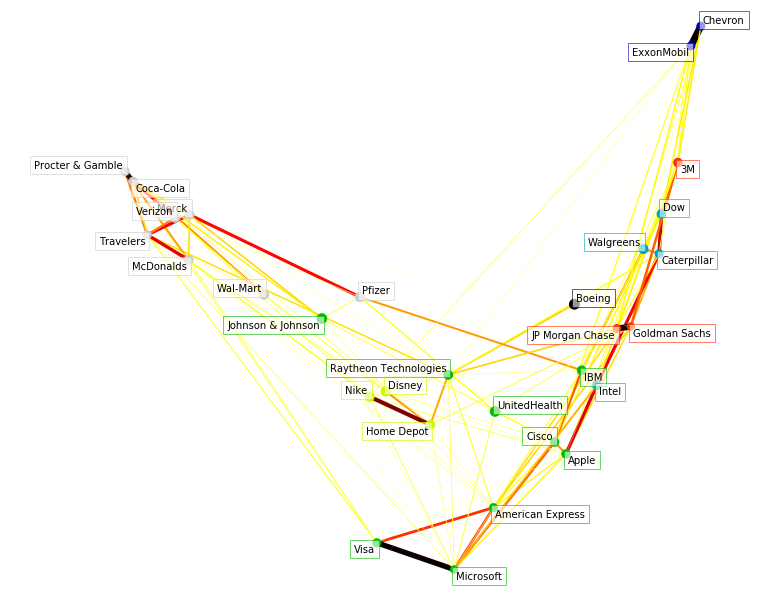

In [ ]:
# #############################################################################
# Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

# #############################################################################
# Visualization
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.nipy_spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()